In [1]:
#import necessary packages and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# import the data from the csv file takehome_user_engagement.csv
df_user_engagement = pd.read_csv('takehome_user_engagement.csv')

In [3]:
# get some information about the data
df_user_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [4]:
# convert the time_stamp from string to datetime 
df_user_engagement['time_stamp'] = pd.to_datetime(df_user_engagement['time_stamp'])

In [5]:
# check the datatype of time_stamp
df_user_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null datetime64[ns]
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [6]:
# import the data from the csv file takehome_user_engagement.csv
df_user = pd.read_csv('takehome_users.csv', encoding = "ISO-8859-1")

In [7]:
# check the dataframe
df_user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [8]:
# get information about the data 
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [9]:
# calculate some statistics from the dataframe
df_user.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


In [10]:
# sort the dataframe by time_stamp
df_user_engagement = df_user_engagement.sort_values(by='time_stamp')

In [11]:
# check the dataframe
df_user_engagement.head()

,time_stamp,user_id,visited
178140,2012-05-31 08:20:06,10012,1
59486,2012-05-31 15:47:36,3428,1
175638,2012-05-31 17:19:37,9899,1
26821,2012-05-31 21:58:33,1693,1
109716,2012-06-01 00:17:30,6102,1


In [12]:
# Group the data by user_id and weekly time_stamp and get the sum of visited in each week
df_weekly_engagement = df_user_engagement.groupby(['user_id', pd.Grouper(key='time_stamp', freq='W-Mon')])['visited'].sum().reset_index().sort_values('time_stamp')

In [13]:
df_weekly_engagement.describe()

,user_id,visited
count,68796.000000,68796.000000
mean,5946.174123,3.022225
std,3434.562709,2.031860
min,1.000000,1.000000
25%,3066.000000,1.000000
50%,5783.500000,2.000000
75%,8959.750000,4.000000
max,12000.000000,7.000000


In [14]:
# create a new boolean column where 1 is true and 0 is false
# if the user visited more than 3 times in a week than True
df_weekly_engagement['adopted_user'] = np.where(df_weekly_engagement['visited']>=3, 1,0)

In [15]:
# Create a new dataframe which saves the user_id of all the adopted user
df_adopted_user = df_weekly_engagement[df_weekly_engagement['adopted_user']==1][['user_id','adopted_user']].drop_duplicates('user_id')

In [16]:
# check the new dataframe
df_adopted_user.head()

,user_id,adopted_user
9337,1693,1
39794,6886,1
4130,728,1
67471,11764,1
8769,1525,1


In [17]:
# Using left join, join two dataframe on user_id and object_id
df = pd.merge(df_user, df_adopted_user, how='left', left_on = 'object_id', right_on='user_id')

In [18]:
# check the join
df[df['adopted_user']==1].head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id,adopted_user
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,10.0,1.0
19,20,2014-03-06 11:46:38,Helms Mikayla,lqyvjilf@uhzdq.com,SIGNUP,1.401364e+09,0,0,58,NaN,20.0,1.0
41,42,2012-11-11 19:05:07,Pinto Giovanna,GiovannaCunhaPinto@cuvox.de,SIGNUP,1.401045e+09,1,0,235,NaN,42.0,1.0
42,43,2012-12-31 07:13:17,Gomes Beatrice,vgqmpljq@yyyxt.com,GUEST_INVITE,1.366010e+09,0,0,63,149.0,43.0,1.0
52,53,2013-02-09 23:47:15,Ribeiro Camila,CamilaGomesRibeiro@gmail.com,GUEST_INVITE,1.367798e+09,0,0,37,3641.0,53.0,1.0


In [19]:
# get the information about the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 12 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
user_id                       1444 non-null float64
adopted_user                  1444 non-null float64
dtypes: float64(4), int64(4), object(4)
memory usage: 1.2+ MB


We have missing or null data in last_session_creation_time, invited_by_user_id, user_id, and adopted_user columns.

We have object_id which is user_id, so we can remove the column user_id because it has missing values.

We will fill null values with 0 in adopted_user because those users who are not adopted_user should be 0 or False as adopted user.

invited_by_user_id null values can also be set to 0 because the user_id starts with 1, and if no other user invited this user to signup then 0 means no.

For last_session_creation_time null values we need to disucss with our team.

In this project, I will not include name, object_id, email_address, creation_time, last_session_creation_time, and user_id. I will only include creation_source, opted_in_to_mailing_list, enabled_for_marketing_drip, org_id, invited_by_user_id as features and adopted_user as label. I will transform invited_by_user_id to a boolean 1 for True and 0 for False and take care of missing values.

In my opinion and looking at the data, the factors important to predict future user adoption would be creation_source, opted_in_to_mailing_list, enabled_for_marketing_drip, org_id, and invited_by_user_id.

In [20]:
# Make a copy of the dataframe df
new_df = df.copy()

In [21]:
new_df = new_df[['object_id','creation_source','opted_in_to_mailing_list',
                 'enabled_for_marketing_drip','org_id','invited_by_user_id','adopted_user']]

In [22]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 7 columns):
object_id                     12000 non-null int64
creation_source               12000 non-null object
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
adopted_user                  1444 non-null float64
dtypes: float64(2), int64(4), object(1)
memory usage: 750.0+ KB


In [23]:
# convert where there is org_id use 1 for True and where there is no org_id use 0 for False
new_df['org_id'] = np.where(new_df['org_id']!=0, 1, 0)

In [24]:
# fill the NaN values with 0, which mean the user is not invited by any other user
new_df['invited_by_user_id'] = new_df['invited_by_user_id'].fillna(0)

In [25]:
# convert where there is invited_by_user_id use 1 for True and where there is no invited_by_user_id use 0 for False 
new_df['invited_by_user_id'] = np.where(new_df['invited_by_user_id']!=0, 1, 0)

In [26]:
# fill the NaN values with 0, which tell us that the user is not adopted_user
new_df['adopted_user'] = new_df['adopted_user'].fillna(0)

In [27]:
new_df.head()

,object_id,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,GUEST_INVITE,1,0,1,1,0.0
1,2,ORG_INVITE,0,0,1,1,0.0
2,3,ORG_INVITE,0,0,1,1,0.0
3,4,GUEST_INVITE,0,0,1,1,0.0
4,5,GUEST_INVITE,0,0,1,1,0.0


In [28]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 7 columns):
object_id                     12000 non-null int64
creation_source               12000 non-null object
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int32
invited_by_user_id            12000 non-null int32
adopted_user                  12000 non-null float64
dtypes: float64(1), int32(2), int64(3), object(1)
memory usage: 656.2+ KB


In [29]:
new_df.adopted_user.value_counts()

0.0    10556
1.0     1444
Name: adopted_user, dtype: int64

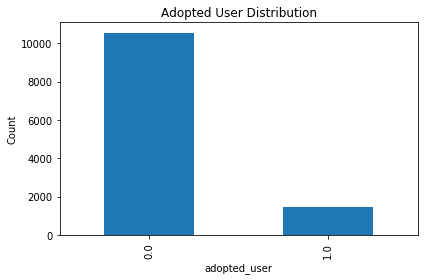

In [30]:
plt.xlabel('adopted_user')
plt.ylabel('Count')
plt.title('Adopted User Distribution')
new_df.adopted_user.value_counts().plot(kind='bar')
plt.tight_layout()

There are more non adopted_user than adopted_user. This tells us that there is a problem of class imbalance with the dataset.

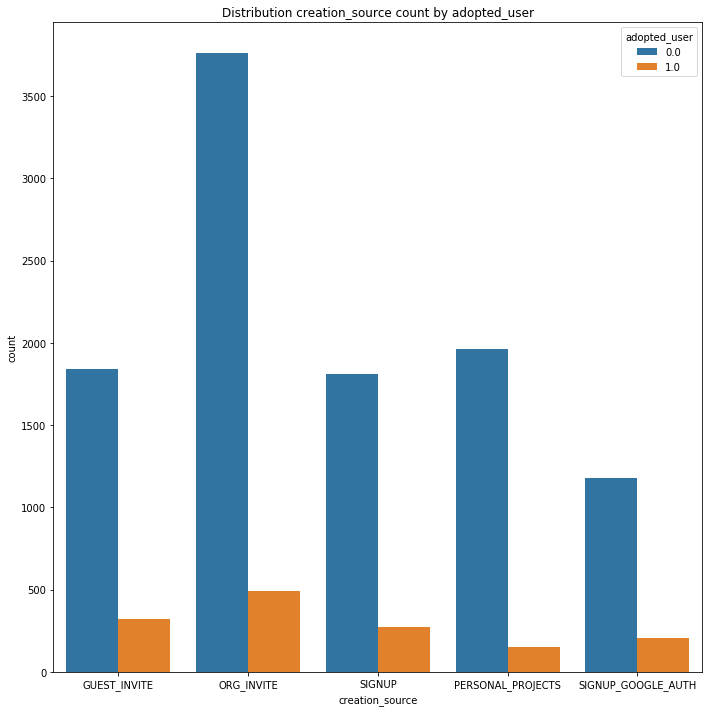

In [31]:
plt.figure(figsize=(10,10))
sns.countplot(x='creation_source', hue='adopted_user', data = new_df)
plt.title('Distribution creation_source count by adopted_user')
plt.tight_layout()

The user account created by ORG_INVITE has maximum number of both adopted and non adopted users.

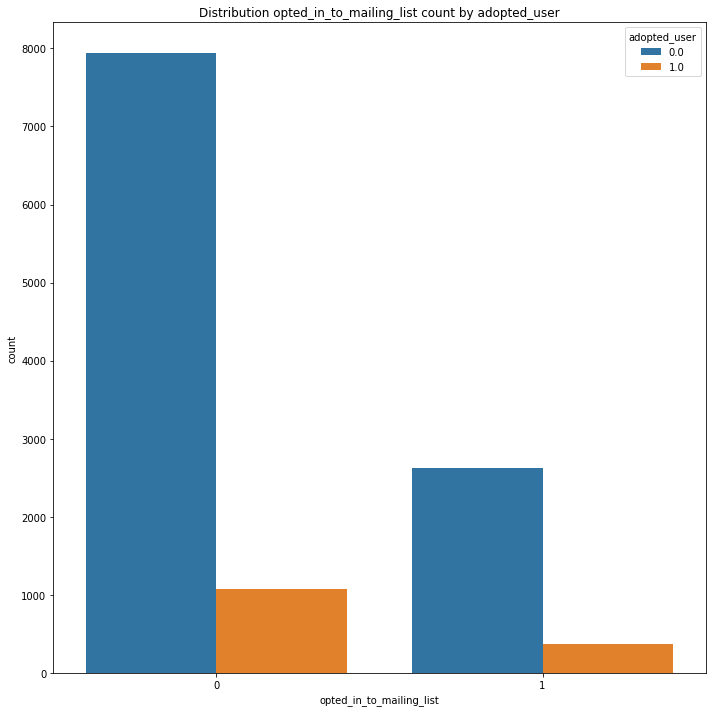

In [32]:
plt.figure(figsize=(10,10))
sns.countplot(x='opted_in_to_mailing_list', hue='adopted_user', data = new_df)
plt.title('Distribution opted_in_to_mailing_list count by adopted_user')
plt.tight_layout()

User who are not opted in to mailing list has maximum number of both adopted and non adopted users.

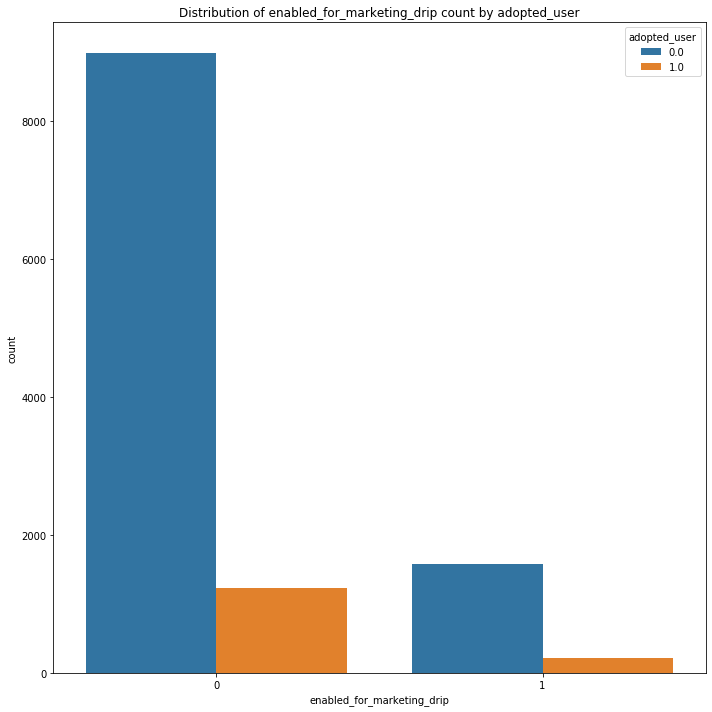

In [33]:
plt.figure(figsize=(10,10))
sns.countplot(x='enabled_for_marketing_drip', hue='adopted_user', data = new_df)
plt.title('Distribution of enabled_for_marketing_drip count by adopted_user')
plt.tight_layout()

User who are not on the regular marketing email drip has maximum number of both adopted and non adopted users.

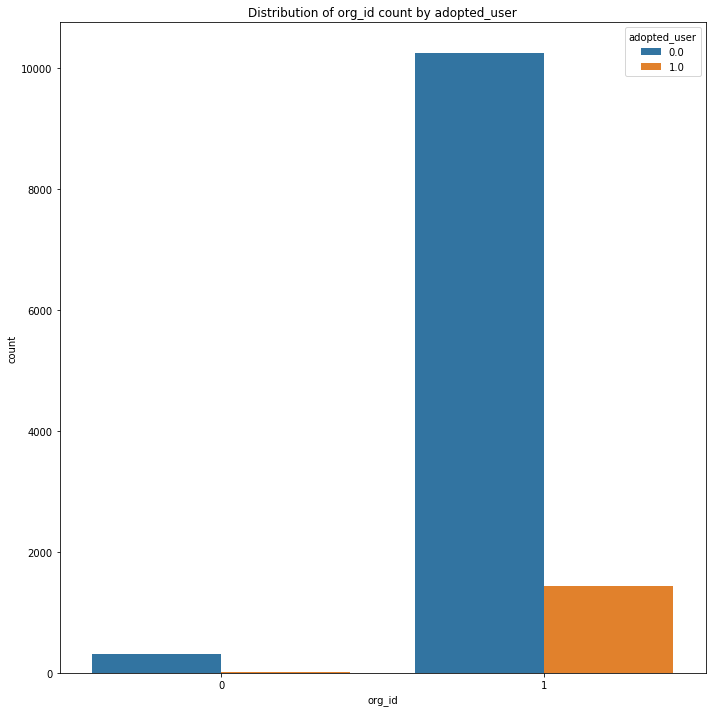

In [34]:
plt.figure(figsize=(10,10))
sns.countplot(x='org_id', hue='adopted_user', data = new_df)
plt.title('Distribution of org_id count by adopted_user')
plt.tight_layout()

The user who belong to some organization has maximum number of adopted and non-adopted users.

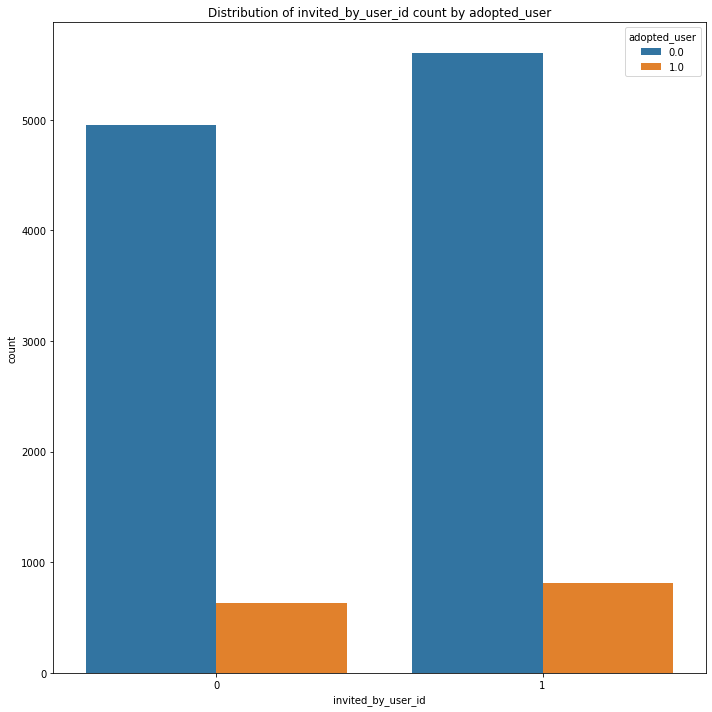

In [35]:
plt.figure(figsize=(10,10))
sns.countplot(x='invited_by_user_id', hue='adopted_user', data = new_df)
plt.title('Distribution of invited_by_user_id count by adopted_user')
plt.tight_layout()